# Programming Exercise 1 - Linear Regression

1. [warmUpExercise](#1.-warmUpExercise)
2. [Linear regression with one variable](#2.-Linear-regression-with-one-variable)
    1. [Plotting the Data](#2.1-Plotting-the-Data)
    2. [Gradient Descent](#2.2-Gradient-Descent)
        1. [Update Equation](#2.2.1-Update-Equation)
        2. [Implementatioin](#2.2.2-Implementatioin)
        3. [Computing the cost J](#2.2.3-Computing-the-cost-J)
        4. [Implementation of Gradient descent](#2.2.4-Gradient-descent)
    3. [Debugging](#2.3-Debugging)
    4. [Visualizing J](#2.4-Visualizing-J)
3. [Linear regression with multiple variables](#3.-Linear-regression-with-multiple-variables)
    1. [Feature Normalization](#3.1-Feature-Normalization)
    2. [Implementation of Gradient descent](#3.2-Gradient-Descent)
        1. [Selecting learning rates](#3.2.1-Selecting-learning-rates)
    3. [Normal Equations](#3.3-Normal-Equations)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 1. warmUpExercise

In [2]:
def warmUpExercise():
    return np.identity(5)

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2. Linear regression with one variable

In [4]:
def load(path):
    # load the dataset
    # read comma separated data
    data = np.loadtxt(path, delimiter=",")

    # y is a vector
    X, y = np.hsplit(data, (-1,))
    # number of training examples
    m = y.size

    X_with_1stc_Ones = np.column_stack((np.ones(y.size), X))
    return data, X, y, m, X_with_1stc_Ones

In [5]:
data, X, y, m, X_with_1stc_Ones = load("./machine-learning-ex1/ex1/ex1data1.txt")

### 2.1 Plotting the Data

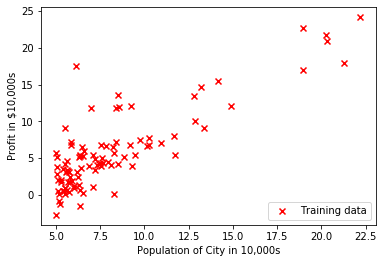

In [6]:
# Before starting on any task,
# it is often useful to understand the data by visualizing it
figure = plt.figure()
ax1 = figure.add_subplot(1, 1, 1)
# For this dataset, you can use a scatter plot to visualize the data
ax1.scatter(X, y, c="r", marker='x', label="Training data")
# Set the y-axis label
ax1.set_ylabel('Profit in $10,000s')
# Set the x-axis label
ax1.set_xlabel('Population of City in 10,000s')

# show label
ax1.legend(loc='lower right')

### 2.2 Gradient Descent

#### 2.2.1 Update Equation

$$
\begin{split}
\theta_{t+1} &:= \theta_{t} - \alpha\nabla_{\theta}\ell(f_{\theta}(x),y)\\
\theta_{j} &:= \theta_{j} - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}\\
\theta &:= \theta - \frac{\alpha}{m}X^{\mathbf{T}}(X\theta-\vec{y})
\end{split}
$$

#### 2.2.2 Implementatioin

In [7]:
def updateTheta(theta, X_with_1stc_Ones, y, alpha):
    return theta - (alpha / m) * X_with_1stc_Ones.T.dot((X_with_1stc_Ones.dot(theta) - y))

#### 2.2.3 Computing the cost J

The objectiev of linear regression is to minimize the cost function
$$
\begin{gather*}
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}\\
h_{\theta}(x) = \theta^{\mathbf{T}}x
\end{gather*}
$$

**Implementation Note:** In the multivariate case, the cost function can also be written in the following vectorized form
$$
\begin{equation}
J(\theta) = \frac{1}{2m}(X\theta-\vec{y})^{\mathbf{T}}(X\theta-\vec{y})
\end{equation}
$$

In [8]:
# receive X without first coloum initialize as ones
def computeCost(X_with_1stc_Ones, y, theta):
    tmp = X_with_1stc_Ones.dot(theta) - y
    return np.asscalar(tmp.T.dot(tmp) / (m * 2))

theta = np.zeros((2, 1))  # initialize fitting parameter
# You should expect to see a cost of 32.07
result = computeCost(X_with_1stc_Ones, y, theta)
assert round(result, 2) == 32.07

#### 2.2.4 Gradient descent

In [9]:
def gradient_descent(X_with_1stc_Ones, y, theta=None, iterations=1500, alpha=0.01):
    m, n_features = X_with_1stc_Ones.shape
    theta = np.zeros((n_features, 1))
    j_cost_history = np.empty((iterations,))
    for i in np.arange(iterations):
        theta = updateTheta(theta, X_with_1stc_Ones, y, alpha)
        # calls computeCost on every iteration
        j_cost_history[i] = computeCost(X_with_1stc_Ones, y, theta)
    return theta, j_cost_history


theta:  [-3.63029144  1.16636235]


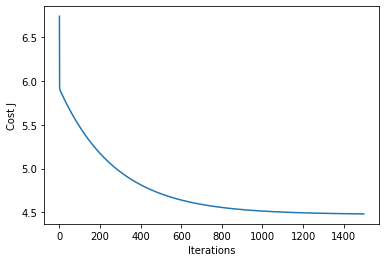

In [10]:
theta, j_cost_history = gradient_descent(X_with_1stc_Ones, y)
print('theta: ', theta.ravel())

# if you have implemented gradient descent and computeCost correctly
# your value of J(theta) should never increase,
# and should converge to a steady value by the end of the algorithm
plt.plot(j_cost_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');


### 2.3 Debugging

/home/dalao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


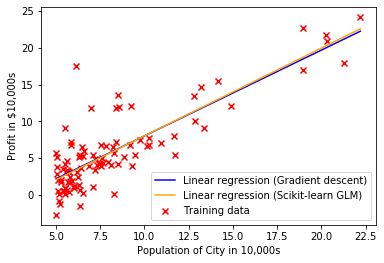

In [11]:
# reuse the previous figure
ax = figure.add_subplot(1, 1, 1)

max_x, max_y = data.max(axis=0)
min_x, min_y = data.min(axis=0)

# Plot gradient descent
simulate_x = np.linspace(min_x, max_x)
simulate_y = theta[0] + simulate_x * theta[1]
ax.plot(simulate_x, simulate_y, c='b', label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression
reg = LinearRegression()
# LinearRegression will take in its fit method arrays X, y 
# and will store the coefficients w of the linear model in its coef_ member
reg.fit(X, y.ravel())
# the vector w = (w1,..., wj) as coef_and w_0 as intercept_.
linear_aprox_skilearn_y = reg.intercept_ + reg.coef_ * simulate_x
ax.plot(simulate_x, linear_aprox_skilearn_y, c='orange', label='Linear regression (Scikit-learn GLM)')

# Now add the legend with some customizations.
ax.legend(loc='lower right')
figure

In [12]:
# Predict profit for a city with population of 35000 and 70000
predict1 = np.array([1, 3.5]).dot(theta)
predict2 = np.array([1, 7]).dot(theta)
print(predict1, predict2)

[0.45197679] [4.53424501]


### 2.4 Visualizing J

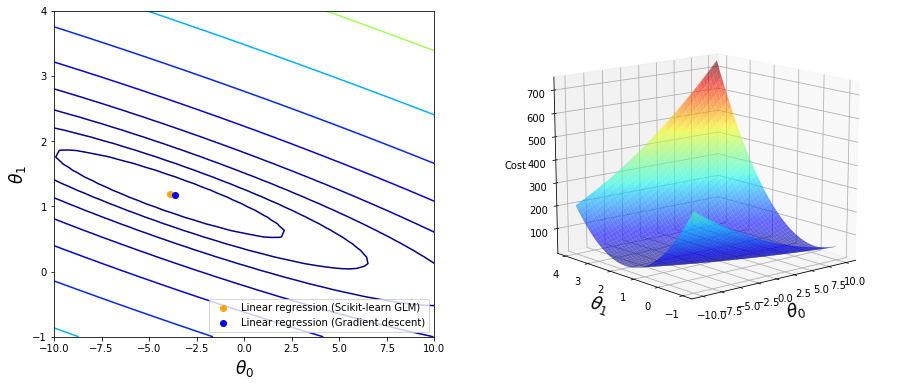

In [13]:
# Create grid coordinates for plotting
T0 = np.linspace(-10, 10)
T1 = np.linspace(-1, 4)
xx, yy = np.meshgrid(T0, T1, indexing='xy')
# initialize J vals to a matrix of 0's
Z = np.zeros((T0.size, T1.size))
# Calculate Z-values (Cost) based on grid of coefficients
# Fill out J.vals
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = computeCost(X_with_1stc_Ones, y, theta=[[xx[i, j]], [yy[i, j]]])

cost_fig = plt.figure(figsize=(15, 6))
ax1 = cost_fig.add_subplot(121)
ax2 = cost_fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(reg.intercept_, reg.coef_, c='orange', label='Linear regression (Scikit-learn GLM)')
ax1.scatter(theta[0], theta[1], c='b', label='Linear regression (Gradient descent)')
ax1.legend(loc='lower right')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in cost_fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

## 3. Linear regression with multiple variables

In [14]:
# The first column is the size of the house (in square feet),
# the second column is the number of bedrooms, 
# and the third column is the price of the house.
data, X, y, m, X_with_1stc_Ones = load("./machine-learning-ex1/ex1/ex1data2.txt")

### 3.1 Feature Normalization

In [15]:
def feature_normalize(X):
    # Subtract the mean value of each feature from the dataset
    features_mean = np.mean(X, axis=0)

    # Calculate their respective “standard deviations".
    features_std = np.std(X, axis=0)

    # After subtracting the mean, additionally scale (divide) the feature values by std
    # numpy Broadcasting operation
    scaled_X = (X - features_mean) / features_std
    # When normalizing the features, it is important to store the values used for normalization
    # when predict a new x value, we must first normalize x using the mean and standard deviation 
    # that we had previously computed from the training set.
    return scaled_X, features_mean, features_std


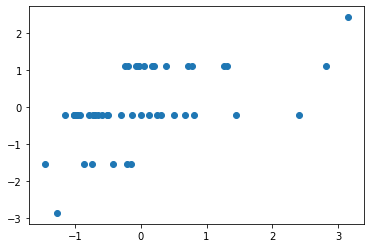

In [16]:
scaled_X, features_mean, features_std = feature_normalize(X)
# most data points will lie within ± 2 standard deviations of the mean
plt.scatter(*np.hsplit(scaled_X, 2))


### 3.2 Gradient Descent

In [17]:
# uses the previously defined function
scaled_X_with_1stc_Ones = np.column_stack((np.ones(y.size), scaled_X))
theta_sol, j_his = gradient_descent(scaled_X_with_1stc_Ones, y, iterations=5000)

print(*theta_sol)

[340412.65957447] [109447.79645425] [-6578.35483877]


In [18]:
reg = LinearRegression()
reg.fit(scaled_X, y.ravel())
print(reg.intercept_, *reg.coef_)

340412.6595744681 109447.79646964178 -6578.354854161259


#### 3.2.1 Selecting learning rates

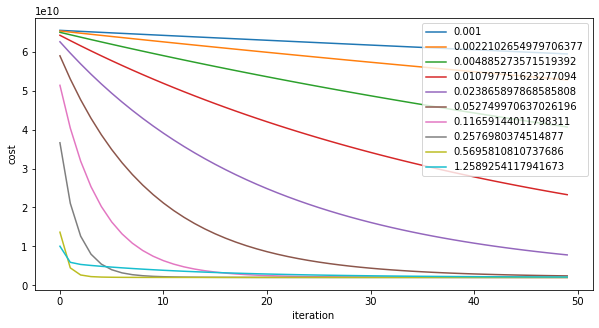

In [19]:
alpha_choice = plt.figure(figsize=(10, 5))
ax = alpha_choice.add_subplot(1, 1, 1)
for i in np.logspace(-3, 0.1, 10):
    # run gradient descent for about 50 iterations at the chosen learning rate
    _____theta, his = gradient_descent(scaled_X_with_1stc_Ones, y, alpha=i, iterations=50)
    ax.plot(his, label=str(i))

ax.set_xlabel("iteration")
ax.set_ylabel("cost")
ax.legend(loc='upper right')


In [20]:
# predict the price of a house with 1650 square feet and 3 bedrooms
x = (np.array([1650, 3]) - features_mean) / features_std
# you will use value later to check your implementation of the normal equation
np.concatenate((np.array([1]), x)).dot(theta_sol)


array([293081.46433828])

### 3.3 Normal Equations

$$
\theta = (X^TX)^{-1}X^T\vec{y}
$$

In [21]:
# Using this formula does not require any feature scaling,
# and you will get an exact solution in one calculation
def normal_equations(X_with_1stc_Ones, y):
    # it uses the pseudo-inverse rather then real inverse
    return np.linalg.pinv(X_with_1stc_Ones.T.dot(X_with_1stc_Ones)).dot(X_with_1stc_Ones.T).dot(y)


In [22]:
theta_sol_by_ne = normal_equations(X_with_1stc_Ones, y)
# You should find that gives the almost same predicted price 
# as the value you obtained using the model fit with gradient descent
np.array([1, 1650, 3]).dot(theta_sol_by_ne)


array([293081.46433499])